In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder#for train test splitting
from sklearn.model_selection import train_test_split#for decision tree object
from sklearn.tree import DecisionTreeClassifier#for checking testing results
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree 
from sklearn.tree import plot_tree
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from IPython.display import Image 
from io import StringIO
import pydotplus
from sklearn import tree
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler

In [2]:
#reading the data
df2 = pd.read_excel (r'job selection problem 1.xlsx')
df = pd.DataFrame(df2)
df.head()

,your gender,Your Age,Your Living Location,What is the name of Graduation degree that you have achieved?,Name of the educational institute?,What was the result of the graduation degree (C.G.P.A. out of 4)?,What was the highest educational degree that you have achieved?,Name of the last educational institute:,What was the result of the last education degree?,How is your Problem-solving skill?,...,Transport/car facilities Provided by the current company (mark the suitable options):,Lunch Facilities Provided by the current company (mark the suitable options):,Medical Facilities Provided by the current company (mark the suitable options):,Educational Facilities for children Provided by the current company (mark the suitable options):,Provident fund facilities Provided by the current company (mark the suitable options):,Gratuity facilities Provided by the current company (mark the suitable options):,Higher study facilities Provided by the current company (mark the suitable options):,House/House rent facilities Provided by the current company (mark the suitable options):,Are you satisfied with your current job?,Are you still searching for a new job?
0,Male,27,"Comilla, Bangladesh",IT/ICT/ICE,Noakhali Science & Technology University,3.51-3.75,NaN,NaN,NaN,Moderate,...,No transport facility,No,No Medical facility,No,No,Yes,No Higher study leave facility,No,Yes,No
1,Male,32,Dhaka,ME (Mechanical Engineering)/IPE/CHE/,Sonargaon University,2.26-2.5,Bsc,Sonargaon University,2.26-2.5,Professional,...,"Provided personal car, fuel and driver",Yes,Medical support for employee,Yes,Yes,Yes,Higher study leave facility with no salary,Yes,Yes,No
2,Male,32,Dhaka,Physical Science (Physics/Mathematics etc.),Dhaka University,3.26-3.5,MS,Dhaka University,3.01-3.25,Proficient,...,"Provided personal car, fuel and driver",Yes,Medical support for employee,No,Yes,No,No Higher study leave facility,Yes,Yes,Yes
3,Male,26,Dhaka,IT/ICT/ICE,Nstu,3.01-3.25,Bsc,Nstu,3.01-3.25,Do not have programming skill,...,No transport facility,No,No Medical facility,No,Yes,Yes,Higher study leave facility with no salary,Yes,Yes,Yes
4,Male,28,Dhaka,CSE/EEE/ETE/ECE,Comilla University,3.51-3.75,BSc,Comilla University,3.51-3.75,Moderate,...,No transport facility,Yes,No Medical facility,No,No,Yes,No Higher study leave facility,No,Yes,No


In [3]:
df4= pd.DataFrame({'Feature_names':df.columns[0:17]})
df4

,Feature_names
0,your gender
1,Your Age
2,Your Living Location
3,What is the name of Graduation degree that you...
4,Name of the educational institute?
5,What was the result of the graduation degree (...
6,What was the highest educational degree that y...
7,Name of the last educational institute:
8,What was the result of the last education degree?
9,How is your Problem-solving skill?


In [4]:
#getting information of dataset
df.info()

print(df.shape)

print(df.isnull().any())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 67 columns):
 #   Column                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                --------------  -----  
 0   your gender                                                                                                                           120 non-null    object 
 1   Your Age                                                                                                                              120 non-null    int64  
 2   Your Living Location                                                                                                                  120 non-null    object 
 3   What is the name of Graduation degree that you have achieved?              

In [5]:
target = df['Are you satisfied with your current job?']
df1 = df.copy()
df1 = df1.drop('Are you satisfied with your current job?', axis =1)

# Defining the attributes
X = df1

target

0      Yes
1      Yes
2      Yes
3      Yes
4      Yes
      ... 
115     No
116    Yes
117     No
118    Yes
119    Yes
Name: Are you satisfied with your current job?, Length: 120, dtype: object

In [6]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target
for i in range(66):
    X.iloc[:,i] = le.fit_transform(X.iloc[:,i].astype(str))

y = target

In [7]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
scaler.transform(X)

array([[1.        , 0.30769231, 0.18918919, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 0.69230769, 0.24324324, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.69230769, 0.24324324, ..., 1.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.15384615, 0.24324324, ..., 1.        , 0.        ,
        1.        ],
       [1.        , 0.23076923, 0.08108108, ..., 0.        , 1.        ,
        0.        ],
       [1.        , 0.61538462, 0.24324324, ..., 1.        , 1.        ,
        0.        ]])

In [8]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.20, random_state =0)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (96, 66)
Testing split input-  (24, 66)


In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Defining the decision tree algorithm
dtree=DecisionTreeClassifier(criterion='gini')
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [11]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.92      0.80      0.86        15

    accuracy                           0.83        24
   macro avg       0.83      0.84      0.83        24
weighted avg       0.85      0.83      0.84        24



Text(0.5, 1.0, 'Confussion matrix of Decision Tree')

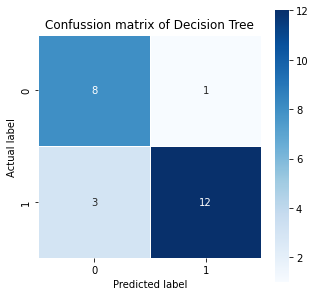

In [95]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.title('Confussion matrix of Decision Tree')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of Decision Tree')

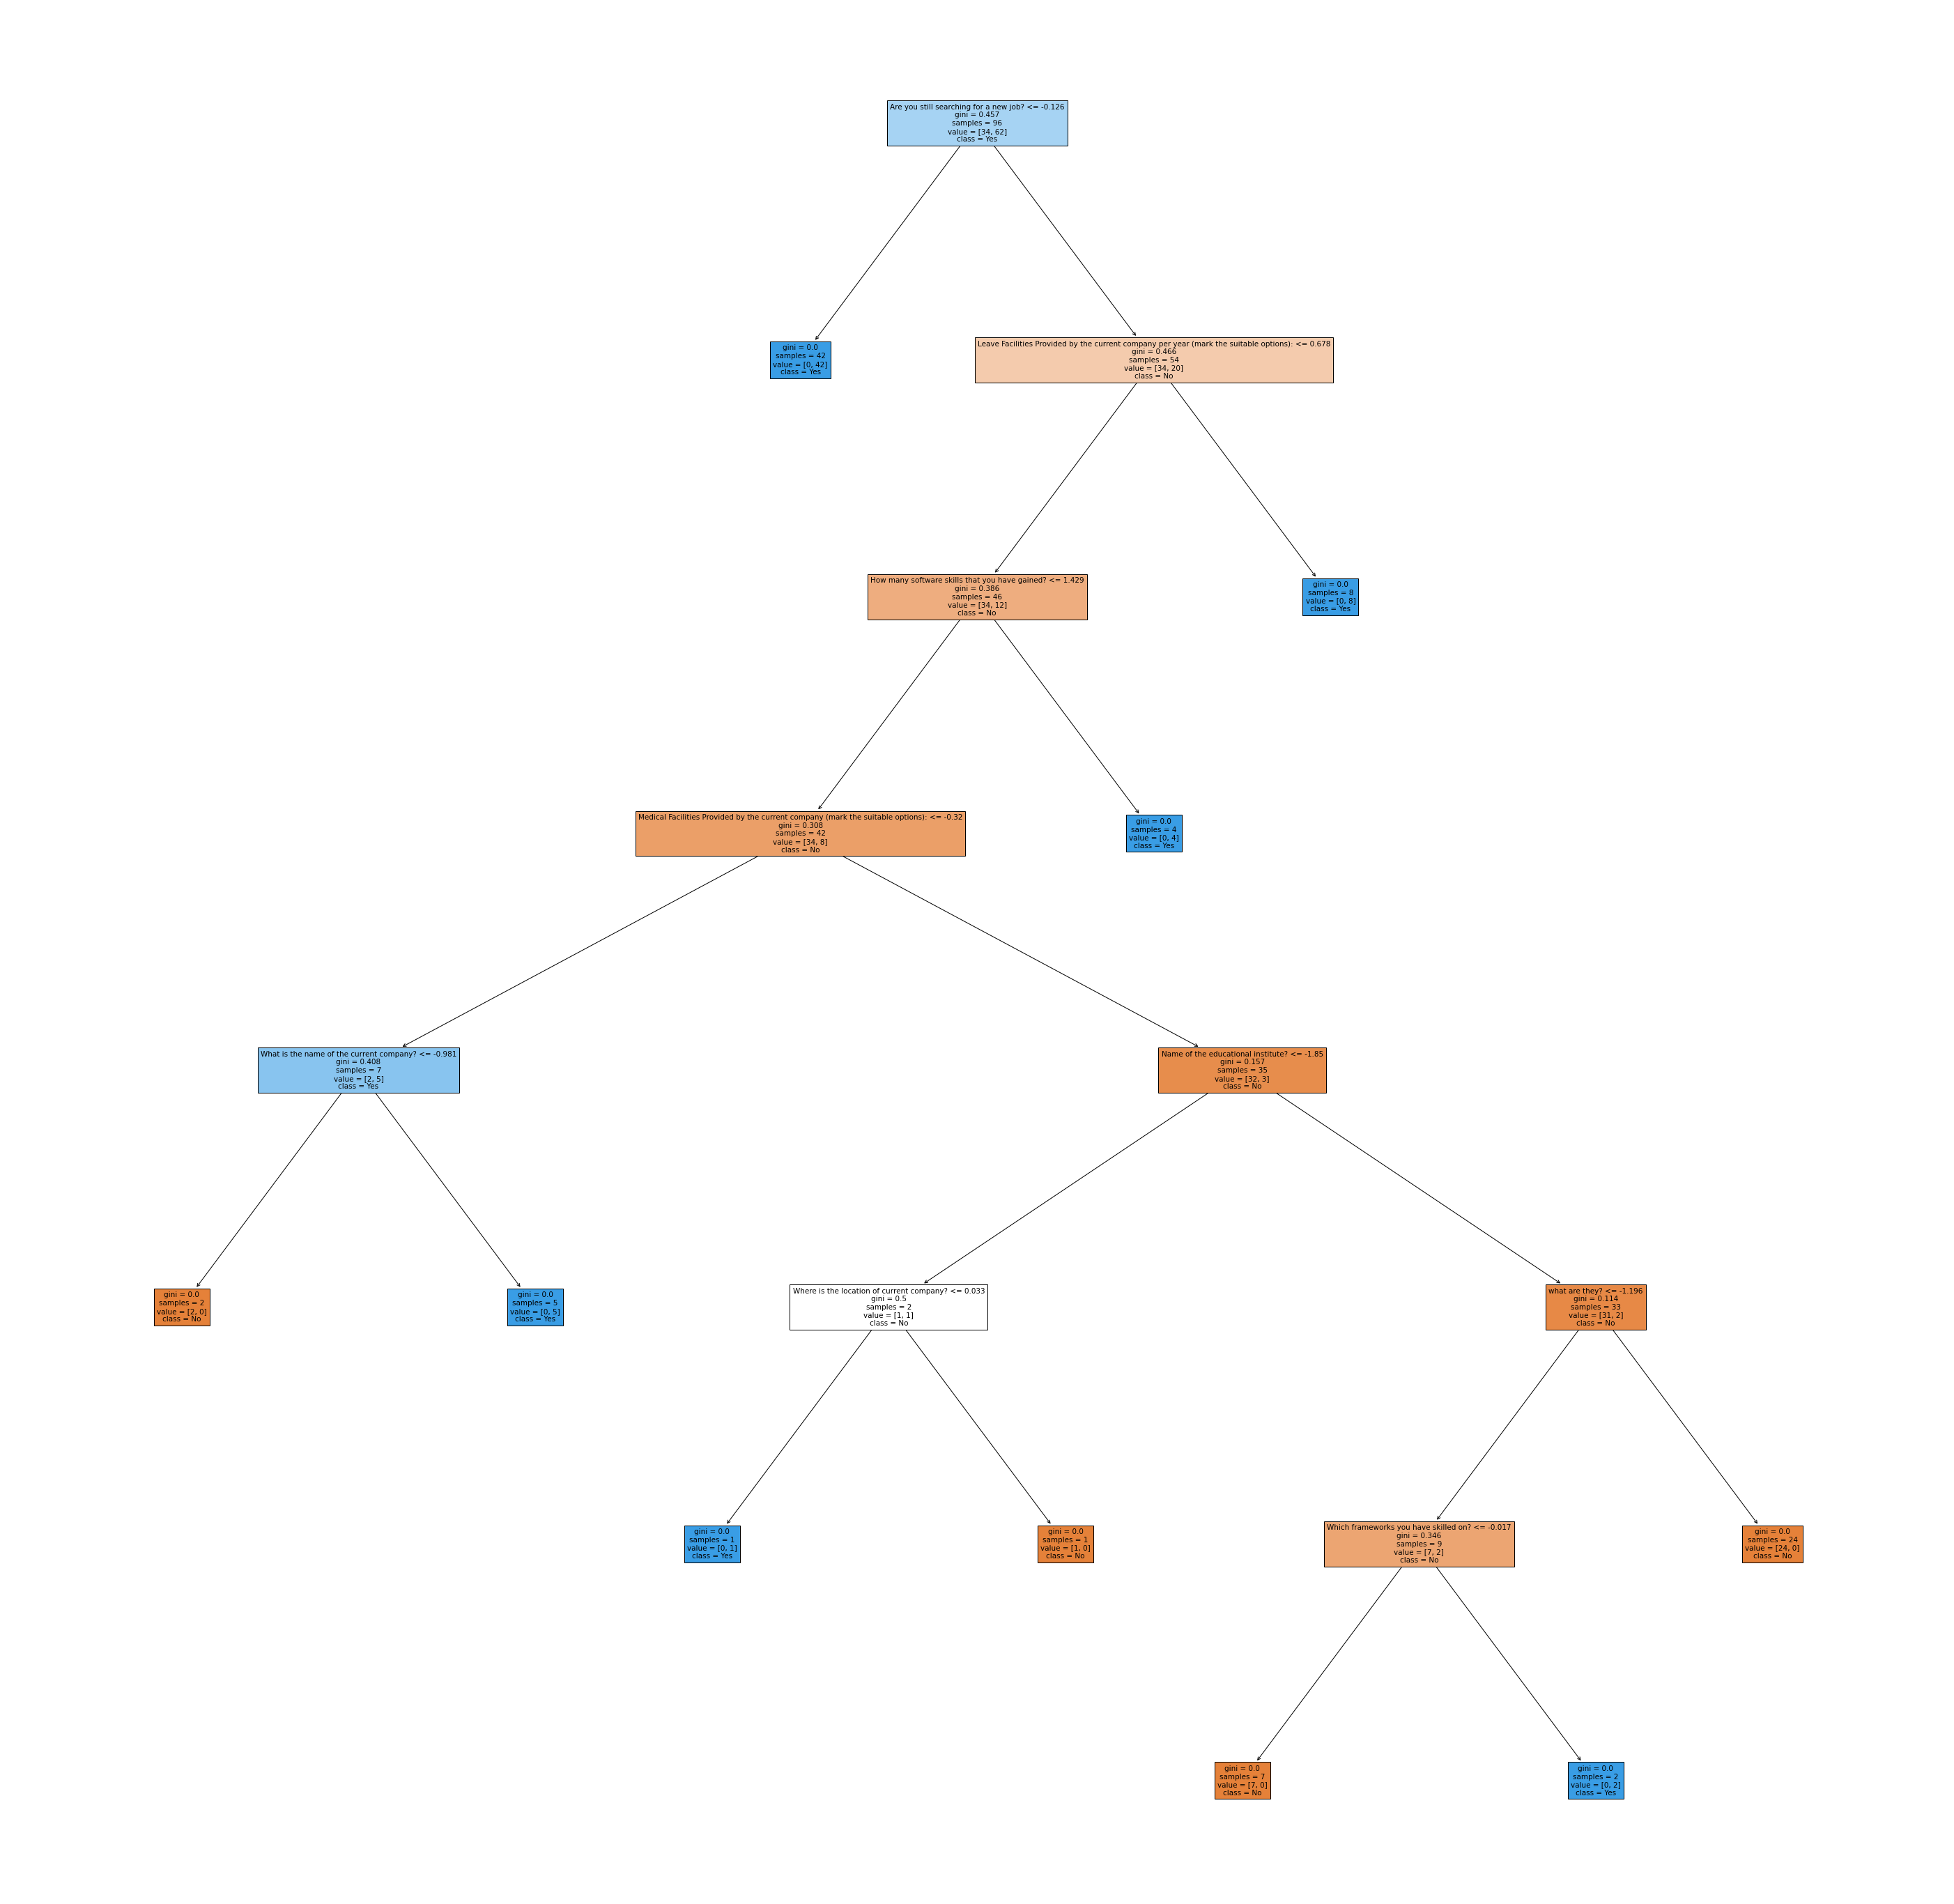

In [13]:
fig = plt.figure(figsize=(50,50))
_ = tree.plot_tree(dtree, 
                   feature_names=df1.columns,  
                   class_names=["No", "Yes" ],
                   filled=True)


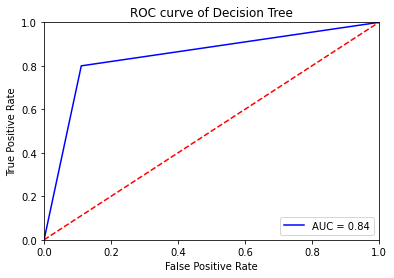

In [15]:

dfper, dtper, dthresholds = roc_curve(y_test, y_pred)


droc_auc = metrics.auc(dfper, dtper)

# method I: plt

plt.title('ROC curve of Decision Tree')
plt.plot(dfper, dtper, 'b', label = 'AUC = %0.2f' % droc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()  

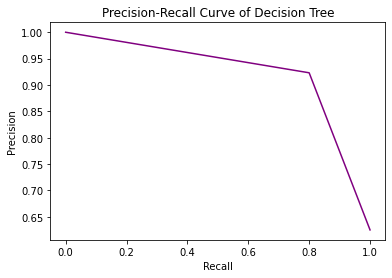

In [16]:


dprecision, drecall, dthresholds = precision_recall_curve(y_test, y_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(drecall, dprecision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve of Decision Tree')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [85]:
from sklearn.neural_network import MLPClassifier


mlp = MLPClassifier(hidden_layer_sizes=(20),random_state =0, activation='relu', solver='adam', max_iter=1500)

mlp.fit(X_train,y_train)


predict_train = mlp.predict(X_train)

predict_test = mlp.predict(X_test)

In [86]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,predict_train))

print(classification_report(y_test,predict_test))

[[34  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1       0.88      1.00      0.94        15

    accuracy                           0.92        24
   macro avg       0.94      0.89      0.91        24
weighted avg       0.93      0.92      0.91        24



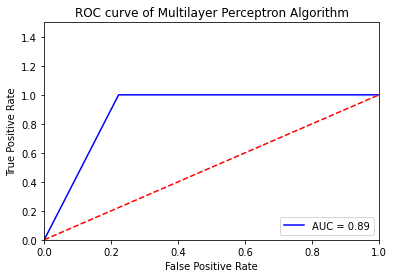

In [87]:
mfper, mtper, mthresholds = roc_curve(y_test, predict_test)


mroc_auc = metrics.auc(mfper, mtper)

# method I: plt

plt.title('ROC curve of Multilayer Perceptron Algorithm')
plt.plot(mfper, mtper, 'b', label = 'AUC = %0.2f' % mroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.5])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

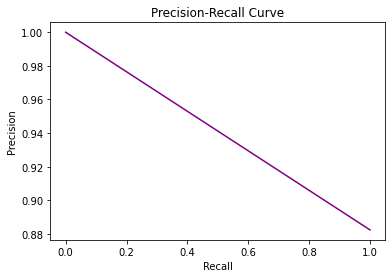

In [88]:

mprecision, mrecall, mthresholds = precision_recall_curve(y_test, predict_test)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(mrecall, mprecision, color='purple')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

Text(0.5, 1.0, 'Confussion matrix of Multilayer Perceptron Algorithm')

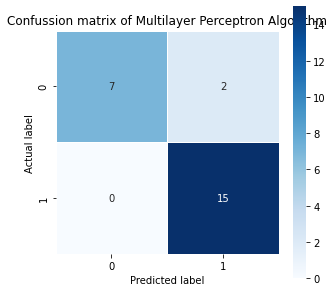

In [96]:
mcm = confusion_matrix(y_test, predict_test)
plt.figure(figsize=(5,5))
sns.heatmap(data=mcm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(mlp.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of Multilayer Perceptron Algorithm')

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=10)
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, kn_pred))
print(classification_report(y_test, kn_pred))

[[ 8  1]
 [ 2 13]]
              precision    recall  f1-score   support

           0       0.80      0.89      0.84         9
           1       0.93      0.87      0.90        15

    accuracy                           0.88        24
   macro avg       0.86      0.88      0.87        24
weighted avg       0.88      0.88      0.88        24



Text(0.5, 1.0, 'Confussion matrix of K-Nearest-Neighbor')

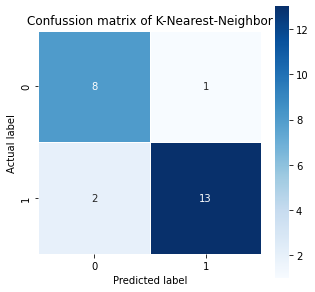

In [97]:
kcm = confusion_matrix(y_test, kn_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=kcm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(kn.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of K-Nearest-Neighbor')

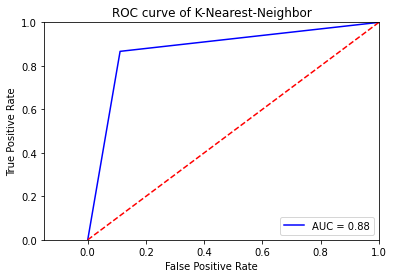

In [74]:
kfper, ktper, kthresholds = roc_curve(y_test, kn_pred)


kroc_auc = metrics.auc(kfper, ktper)

# method I: plt

plt.title('ROC curve of K-Nearest-Neighbor')
plt.plot(kfper,ktper, 'b', label = 'AUC = %0.2f' % kroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.15, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

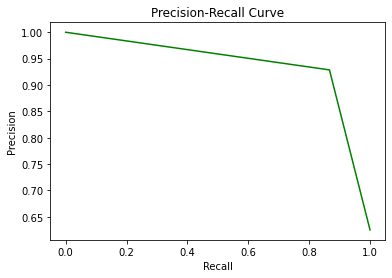

In [46]:
kprecision, krecall, kthresholds = precision_recall_curve(y_test, kn_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(krecall, kprecision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [69]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly')
svclassifier.fit(X_train, y_train)
svm_pred = svclassifier.predict(X_test)
print(confusion_matrix(y_test,svm_pred))
print(classification_report(y_test,svm_pred))

[[ 4  5]
 [ 0 15]]
              precision    recall  f1-score   support

           0       1.00      0.44      0.62         9
           1       0.75      1.00      0.86        15

    accuracy                           0.79        24
   macro avg       0.88      0.72      0.74        24
weighted avg       0.84      0.79      0.77        24



Text(0.5, 1.0, 'Confussion matrix of (SVM)')

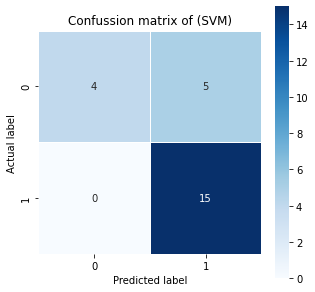

In [99]:
scm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=scm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(svclassifier.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of (SVM)')

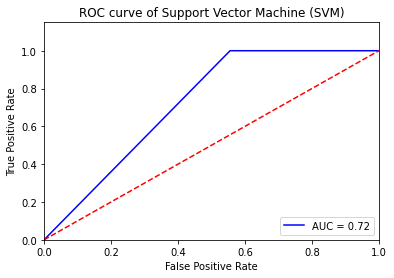

In [73]:
sfper, stper, sthresholds = roc_curve(y_test, svm_pred)


sroc_auc = metrics.auc(sfper, stper)

# method I: plt

plt.title('ROC curve of Support Vector Machine (SVM)')
plt.plot(sfper, stper, 'b', label = 'AUC = %0.2f' % sroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.15])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

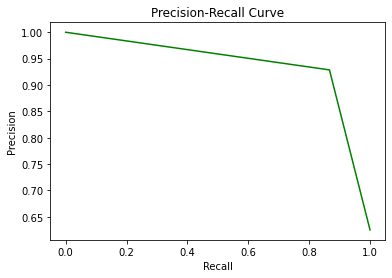

In [50]:
sprecision, srecall, sthresholds = precision_recall_curve(y_test, kn_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(srecall, sprecision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [70]:
#Import Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
gnb_pred = gnb.predict(X_test)

print(confusion_matrix(y_test,gnb_pred))
print(classification_report(y_test,gnb_pred))

[[ 7  2]
 [ 3 12]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.86      0.80      0.83        15

    accuracy                           0.79        24
   macro avg       0.78      0.79      0.78        24
weighted avg       0.80      0.79      0.79        24



Text(0.5, 1.0, 'Confussion matrix of Gaussian Naive Bayes')

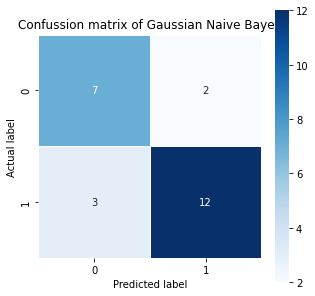

In [100]:
gcm = confusion_matrix(y_test, gnb_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=gcm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(gnb.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of Gaussian Naive Bayes')

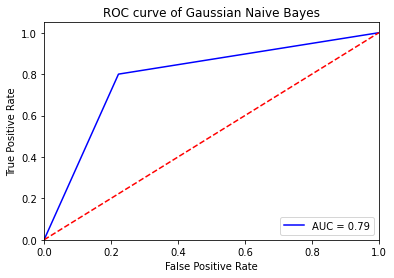

In [68]:
gfper, gtper, gthresholds = roc_curve(y_test, gnb_pred)


groc_auc = metrics.auc(gfper, gtper)

# method I: plt

plt.title('ROC curve of Gaussian Naive Bayes')
plt.plot(gfper, gtper, 'b', label = 'AUC = %0.2f' % groc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

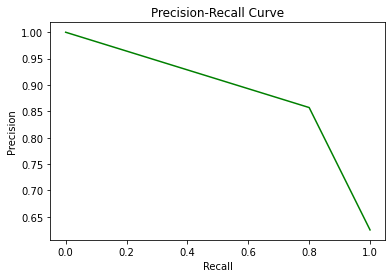

In [54]:
gprecision, grecall, gthresholds = precision_recall_curve(y_test, gnb_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(grecall, gprecision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=125,criterion='gini')
rf.fit(X_train,y_train)

rf_pred=rf.predict(X_test)
print(confusion_matrix(y_test,rf_pred))
print(classification_report(y_test,rf_pred))

[[ 8  1]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.93      0.93      0.93        15

    accuracy                           0.92        24
   macro avg       0.91      0.91      0.91        24
weighted avg       0.92      0.92      0.92        24



Text(0.5, 1.0, 'Confussion matrix of Random Forest')

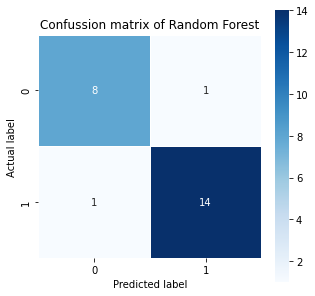

In [101]:
fcm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=fcm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(rf.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of Random Forest')

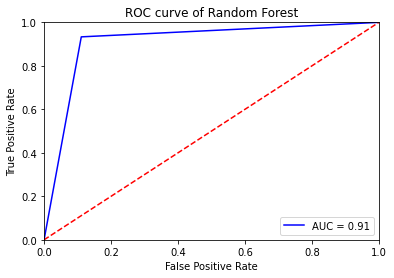

In [80]:
ffper, ftper, fthresholds = roc_curve(y_test, rf_pred)


froc_auc = metrics.auc(ffper, ftper)

# method I: plt

plt.title('ROC curve of Random Forest')
plt.plot(ffper, ftper, 'b', label = 'AUC = %0.2f' % froc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show() 

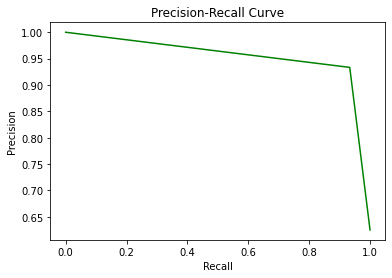

In [58]:
fprecision, frecall, fthresholds = precision_recall_curve(y_test, rf_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(frecall, fprecision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

In [59]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
lr_pred=logreg.predict(X_test)
print(confusion_matrix(y_test,lr_pred))
print(classification_report(y_test,lr_pred))

[[ 4  5]
 [ 1 14]]
              precision    recall  f1-score   support

           0       0.80      0.44      0.57         9
           1       0.74      0.93      0.82        15

    accuracy                           0.75        24
   macro avg       0.77      0.69      0.70        24
weighted avg       0.76      0.75      0.73        24



Text(0.5, 1.0, 'Confussion matrix of Logistic Regression')

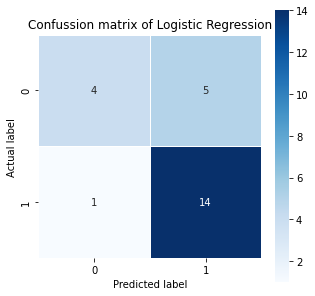

In [102]:
lcm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=lcm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(logreg.score(X_test, y_test))
plt.title(all_sample_title, size = 15)
plt.title('Confussion matrix of Logistic Regression')

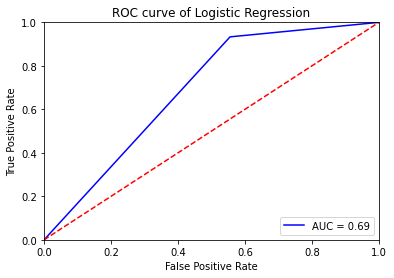

In [61]:
lfper, ltper, lthresholds = roc_curve(y_test,lr_pred)


lroc_auc = metrics.auc(lfper, ltper)

# method I: plt

plt.title('ROC curve of Logistic Regression')
plt.plot(lfper, ltper, 'b', label = 'AUC = %0.2f' % lroc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

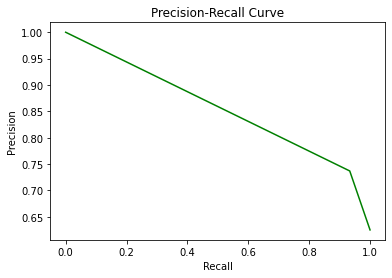

In [62]:
lprecision, lrecall, lthresholds = precision_recall_curve(y_test,lr_pred)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(lrecall, lprecision, color='green')

#add axis labels to plot
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.show()

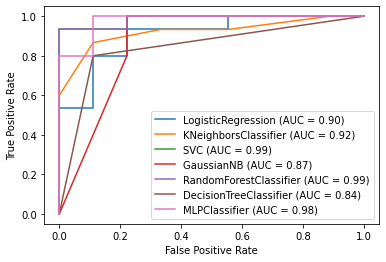

In [66]:
from sklearn.metrics import plot_roc_curve
disp= plot_roc_curve(logreg, X_test, y_test)
plot_roc_curve(kn, X_test, y_test, ax=disp.ax_)
plot_roc_curve(svclassifier, X_test, y_test, ax=disp.ax_)
plot_roc_curve(gnb, X_test, y_test, ax=disp.ax_)
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_)
plot_roc_curve(dtree, X_test, y_test, ax=disp.ax_)
plot_roc_curve(mlp, X_test, y_test, ax=disp.ax_)

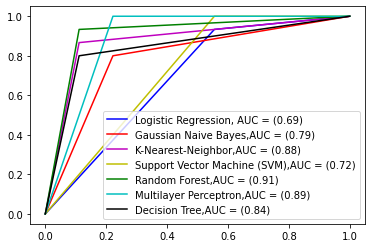

In [114]:
plt.plot(lfper, ltper, 'b',label="Logistic Regression, AUC = (%0.2f)" % lroc_auc)
plt.plot(gfper, gtper, 'r',label="Gaussian Naive Bayes,AUC = (%0.2f)" % groc_auc)
plt.plot(kfper, ktper, 'm',label="K-Nearest-Neighbor,AUC = (%0.2f)" % kroc_auc)
plt.plot(sfper, stper, 'y',label="Support Vector Machine (SVM),AUC = (%0.2f)" % sroc_auc)
plt.plot(ffper, ftper, 'g',label="Random Forest,AUC = (%0.2f)" % froc_auc)
plt.plot(mfper, mtper, 'c',label="Multilayer Perceptron,AUC = (%0.2f)" % mroc_auc)
plt.plot(dfper, dtper, 'k',label="Decision Tree,AUC = (%0.2f)" % droc_auc)
plt.legend()